<a href="https://colab.research.google.com/github/111495zjy/ASP_coursework/blob/main/notebooks/3_Tucker_decomposition_and_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IlyaKisil/dpm-coursework.git
%cd /content/dpm-coursework

!./boostrap-venv.sh

Cloning into 'dpm-coursework'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 143 (delta 3), reused 2 (delta 0), pack-reused 133 (from 1)
Receiving objects: 100% (143/143), 3.38 MiB | 6.76 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/dpm-coursework
./boostrap-venv.sh: line 7: conda: command not found
./boostrap-venv.sh: line 11: conda: command not found
Processing ./binder/coursework
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.8 MB/s eta 0:00:00
  Created wheel for coursework: filename=coursework-0.1.1-py3-none-any.whl size=166608 sha256=8275260790e9e9f372ba3e86d03320b1772cfb87c6039eb2835b40c3356ea1ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-ttyajmnn/wheels/27/4a/5d/4506a6e044a1c3d7b88bb81db683a16b6a1fb55a0614720dd3
Successfull

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install numpy==1.19.5

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor, TensorTKD
from hottbox.algorithms.decomposition import HOSVD, HOOI
from hottbox.utils.generation import residual_tensor
from coursework.data import get_image, plot_tensors

In [4]:
np.random.seed(0)


[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tucker Decomposition

<img src="https://github.com/IlyaKisil/dpm-coursework/blob/master/notebooks/imgs/TensorTKD.png?raw=1" alt="Drawing" style="width: 500px;"/>

In previous [assignment](./2_Efficient_representation_of_multidimensional_arrays.ipynb), you have been provided materials which cover efficient representations of mutlidimensional arrays of data, such as the Tucker form. In this module, you will take a closer look at it and the assiciated computational methods.


Any tensor of arbitrarily large order can be decomposed in the Tucker form. As illustrated above, a tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$ can be represented as a dense core tensor $\mathbf{\underline{G}}$ and a set of factor matrices $\mathbf{A} \in \mathbb{R}^{I \times Q}, \mathbf{B} \in \mathbb{R}^{J \times R}$ and $\mathbf{C} \in
\mathbb{R}^{K \times P}$

$$
\mathbf{\underline{X}} = \mathbf{\underline{G}} \times_1 \mathbf{A} \times_2 \mathbf{B} \times_3 \mathbf{C} = \Big[    \mathbf{\underline{G}} ;  \mathbf{A},  \mathbf{B}, \mathbf{C}      \Big]
$$


On practice, there exist several computational methods to accomplish this all of which are combined into a Tucker Decomposition framework. The two most commonly used algorithms are:
1. Higher Order Singular Value Decomposition ([HOSVD](#Higher-Order-Singular-Value-Decomposition-(HOSVD)))
1. Higher Order Orthogonal Iteration ([HOOI](#Higher-Order-Orthogonal-Iteration-(HOOI)))


**Higher Order Singular Value Decomposition (HOSVD)**

The HOSVD is a special case of the Tucker decomposition, in which all the factor matrices are constrained to be orthogonal. They are computed as truncated version of the left singular matrices of all possible mode-$n$ unfoldings of tensor $\mathbf{\underline{X}}$:

$$
\begin{aligned}
\mathbf{X}_{(1)} &= \mathbf{U}_1  \mathbf{\Sigma}_1 \mathbf{V}_1^T \quad \rightarrow \quad \mathbf{A} = \mathbf{U}_1[1:R_1]\\
\mathbf{X}_{(2)} &= \mathbf{U}_2  \mathbf{\Sigma}_2 \mathbf{V}_2^T \quad \rightarrow \quad \mathbf{B} = \mathbf{U}_2[1:R_2] \\
\mathbf{X}_{(3)} &= \mathbf{U}_3  \mathbf{\Sigma}_3 \mathbf{V}_3^T \quad \rightarrow \quad \mathbf{C} = \mathbf{U}_3[1:R_3] \\
\end{aligned}
$$

After factor matrices are obtained, the core tensor $\mathbf{\underline{G}}$ is computed as

$$
\mathbf{\underline{G}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^T \times_2 \mathbf{B}^T \times_3 \mathbf{C}^T        
$$


# Higher Order Orthogonal Iteration (HOOI)

# HOOI algorithm is another special case of the Tuker decomposition. Like HOSVD, it decomposes a tensor into a dense core tensor and orthogonal factor matrices. The difference between the two lies in the fact that in HOOI the factor matrices are optimized iteratively using an Alternating Least Squares (ALS) approach. In other words, the tucker representation $[ \mathbf{\underline{G}};\mathbf{A}^{(1)}, \mathbf{A}^{(2)}, \cdots,\mathbf{A}^{(N)} ]$ of the given tensor $\mathbf{\underline{X}}$ is obtained through the HOOI as follows

$$
\begin{aligned}
&\mathbf{\underline{Y}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^{(1)T} \times_2 \cdots \times_{n-1} \mathbf{A}^{(n-1)T} \times_{n+1} \mathbf{A}^{(n+1)} \times \cdots \times_N \mathbf{A}^{(N)} \\
&\mathbf{A}^{(n)} \leftarrow R_n \text{ leftmost singular vectors of } \mathbf{Y}_{(n)}
\end{aligned}
$$

The above is repeated until convergence, then the core tensor $\mathbf{\underline{G}} \in \mathbb{R}^{R_1 \times R_2 \times \cdots \times R_N}$ is computed as

$$
\mathbf{\underline{G}} = \mathbf{\underline{X}} \times_1 \mathbf{A}^{(1)T}  \times_2 \mathbf{A}^{(2)T} \times_3 \cdots  \times_N \mathbf{A}^{(N)T}
$$

### Multi-linear rank

*   列表项
*   列表项



The **multi-linear rank** of a tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I_1 \times \cdots \times I_N}$ is the $N$-tuple $(R_1, \dots, R_N)$ where each $R_n$ is the rank of the subspace spanned by mode-$n$ fibers, i.e. $R_n = \text{rank} \big( \mathbf{X}_{(n)} \big)$. Thus, for our order-$3$ tensor the multi-linear rank is $(R_1, R_2, R_3)$. Multi-linear rank provides flexibility in compression and approximation of the original tensor.

> **NOTE:** For a tensor of order $N$ the values $R_1, R_2, \dots , R_N$ are not necessarily the same, whereas, for matrices (tensors of order 2) the equality $R_1 = R_2$ always holds, where $R_1$ and $R_2$ are the matrix column rank and row rank respectively.



# Performing tensor decomposition

In [ ]:
# Create tensor
I, J, K = 5, 6, 7
array_3d = np.random.rand(I * J * K).reshape((I, J, K)).astype(float)
tensor = Tensor(array_3d)

# Initialise algorithm
algorithm = HOSVD()

# Perform decomposing for selected multi-linear rank
ml_rank = (4, 5, 6)
tensor_tkd = algorithm.decompose(tensor, ml_rank)

# Result preview
print(tensor_tkd)

print('\n\tFactor matrices')
for mode, fmat in enumerate(tensor_tkd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))

print('\n\tCore tensor')
print(tensor_tkd.core)

Tucker representation of a tensor with multi-linear rank=(4, 5, 6).
Factor matrices represent properties: ['mode-0', 'mode-1', 'mode-2']
With corresponding latent components described by (5, 6, 7) features respectively.

	Factor matrices
Mode-0 factor matrix is of shape (5, 4)
Mode-1 factor matrix is of shape (6, 5)
Mode-2 factor matrix is of shape (7, 6)

	Core tensor
This tensor is of order 3 and consists of 120 elements.
Sizes and names of its modes are (4, 5, 6) and ['mode-0', 'mode-1', 'mode-2'] respectively.


# Evaluation and reconstruction

Tucker representation of an original tensor is almost always an approximation, regardless of which algorithm has been employed for performing decomposition. Thus, relative error of approximation is commonly used in order to evaluate performance of computational methods, i.e. the ratio between a Frobenious norms of residual and original tensors.

In [ ]:
# Compute residual tensor
tensor_res = residual_tensor(tensor, tensor_tkd)

# Compute error of approximation
rel_error = tensor_res.frob_norm / tensor.frob_norm

print("Relative error of approximation = {}".format(rel_error))

Relative error of approximation = 0.255809658937915


## **Assigment 1**

1. Create a tensor of order 4 with sizes of each mode being defined by prime numbers and  obtain a Tucker representation using HOOI algorithm with multi-linear (4, 10, 6, 2). Then calculation ratio between the number of elements in the original tensor and its Tucker form.

1. For a tensor that consists of 1331 elements, which multi-linear rank guarantees a perfect reconstruction from its Tucker form and why. Is such choice reasonable for practical applications?


### Solution: Part 1

In [ ]:
# Create a tensor
I, J, K, N = 5, 17, 19, 7
array_4d = np.random.rand(I * J * K* N).reshape((I, J, K, N)).astype(float)
X = Tensor(array_4d)


In [ ]:
# Perform decomposition


# 初始化 HOOI 算法
hooi = HOOI()
decomp = hooi.decompose(X, (4, 10, 6, 2))
for mode, fmat in enumerate(tensor_tkd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))


Mode-0 factor matrix is of shape (5, 4)
Mode-1 factor matrix is of shape (6, 5)
Mode-2 factor matrix is of shape (7, 6)


In [ ]:
# Print ratio
orignal_number = array_4d.size
Tucker_number = 0
for mode, fmat in enumerate(tensor_tkd.fmat):
    print('Mode-{} factor matrix is of shape {}'.format(mode, fmat.shape))
    Tucker_number = Tucker_number + fmat.size
Tucker_number = Tucker_number + tensor_tkd.core.size
ratio = orignal_number/Tucker_number
print('ratio is {}(orignal_number/Tucker_number)'.format(ratio))

Mode-0 factor matrix is of shape (5, 4)
Mode-1 factor matrix is of shape (6, 5)
Mode-2 factor matrix is of shape (7, 6)
ratio is 53.325471698113205(orignal_number/Tucker_number)


### Solution: Part 2

**Include your answer with explanations here**


(11^3= 1331)
To make the reconstruction perfect, the multi-linear rank should be (11,11,11).As the factor matrix is achieved by SVD. So if the SVD is perfect, the reconctruction is perfect. The SVD only get the former R Singular Values. So if the R(i) always equal to the number of non-zero Singular Values(equals to the multi-liear rank), the information will not lose. So the multi-linear rank should be (11,11,11).
However, this is not reasonable for application. Because if the core tensor is of the same size as the orignal tensor, the computational is increase and the information is not compressed, which is meaningless.

# Application: Image compression

Color images can be naturally represented as a tensor of order three with the shape `(height x width x channels)` where channels are, for example, Red, Blue and Green (RGB)

<img src="https://github.com/IlyaKisil/dpm-coursework/blob/master/notebooks/imgs/image_to_base_colors.png?raw=1" alt="Drawing" style="width: 500px;"/>

By keeping its original structure, allows to apply methods from multi-linear analysis. For instance, we can employ algorithms for Tucker decompositions in order to commress oringinal informaiton by varying values of desired multi-linear rank.

```python
# Get data in form of a Tensor
car = get_image(item="car", view="top")
tensor = Tensor(car)

# Initialise algorithm and preform decomposition
algorithm = HOSVD()
tensor_tkd = algorithm.decompose(tensor, rank=(25, 25, 3))

# Evaluate result
tensor_res = residual_tensor(tensor, tensor_tkd)
rel_error = tensor_res.frob_norm / tensor.frob_norm

print("Relative error of approximation = {}".format(rel_error))
```

When can also visually inspect image obtained by reconstructing the Tucker representation
```python
# Reconstruction
tensor_rec = tensor_tkd.reconstruct()

# Plot original and reconstructed images side by side
plot_tensors(tensor, tensor_rec)
```

<img src="https://github.com/IlyaKisil/dpm-coursework/blob/master/notebooks/imgs/car_orig_vs_reconstructed_25_25_3.png?raw=1" alt="Drawing" style="width: 500px;"/>

## **Assigment 2**
For this assignment you are provided with function `get_image()` which requires two parameters: `item` and `view`. The valid values for former are **car** and **apple**, while the latter takes only **side** and **top**.

1. Use multi-linear rank equal to `(50, 50, 2)` in order to obtain Tucker representations of images of the car and apple. Analyse results by visually inspecting their reconstructions.

1. Use multi-linear rank equal to `(50, 50, 2)` in order to obtain Tucker representations of images of the apple taken from the top and from the side. Analyse results by visually inspecting their reconstructions.

1. What would happen to the reconstruction if the value of multi-linear rank corresponding to the channel mode is decreased to 1.


### Solution: Part 1

In [5]:
# Create tensors from images
apple = get_image(item="apple", view="top")
tensor_apple = Tensor(apple)
car = get_image(item="car", view="top")
tensor_car = Tensor(car)

In [6]:
# Perform decomposition
# Initialise algorithm and preform decomposition
algorithm = HOSVD()
tensor_tkd_apple = algorithm.decompose(tensor_apple, rank=(50, 50, 2))
tensor_tkd_car = algorithm.decompose(tensor_car, rank=(50, 50, 2))

Relative error of approximation(apple) = 0.08277558463233833
Relative error of approximation(car) = 0.049915778045715106


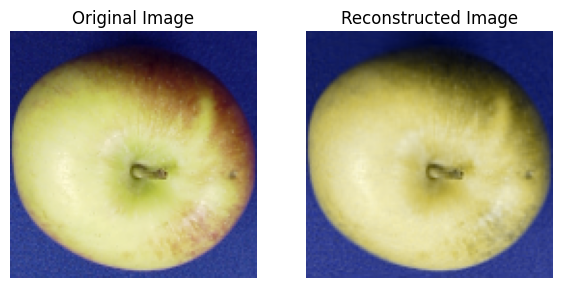

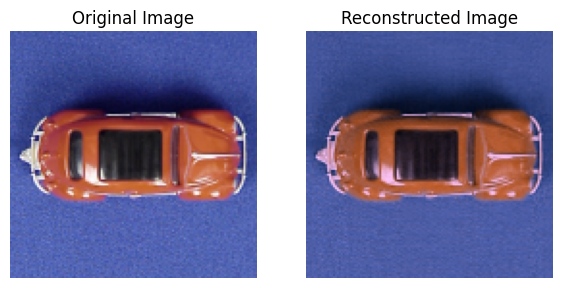

In [8]:
# Evaluate results

# Evaluate result
tensor_res_apple = residual_tensor(tensor_apple, tensor_tkd_apple)
rel_error_apple = tensor_res_apple.frob_norm / tensor_apple.frob_norm
tensor_res_car = residual_tensor(tensor_car, tensor_tkd_car)
rel_error_car = tensor_res_car.frob_norm / tensor_car.frob_norm

print("Relative error of approximation(apple) = {}".format(rel_error_apple))
print("Relative error of approximation(car) = {}".format(rel_error_car))
# Reconstruction

tensor_rec_apple  = tensor_tkd_apple.reconstruct()

tensor_rec_car = tensor_tkd_car.reconstruct()
# Plot original and reconstructed images side by side
plot_tensors(tensor_apple, tensor_rec_apple)
plot_tensors(tensor_car, tensor_rec_car)

**Include your explanations here**


It is observed that after reconstruction, the car image shows no noticeable visual difference. However, in the case of the apple, the red region of the apple image is eliminated. For all the images, the blue part is preserved after reconctruction.

### Solution: Part 2

In [9]:
# Create tensors from images
apple_top = get_image(item="apple", view="top")
tensor_top = Tensor(apple_top)
apple_side = get_image(item="apple", view="side")
tensor_side = Tensor(apple_side)

In [10]:
# Perform decomposition
algorithm = HOSVD()
tensor_tkd_top = algorithm.decompose(tensor_top, rank=(50, 50, 2))
tensor_tkd_side = algorithm.decompose(tensor_side, rank=(50, 50, 2))

Relative error of approximation(top) = 0.03706225838740823
Relative error of approximation(side) = 0.06574690406026337


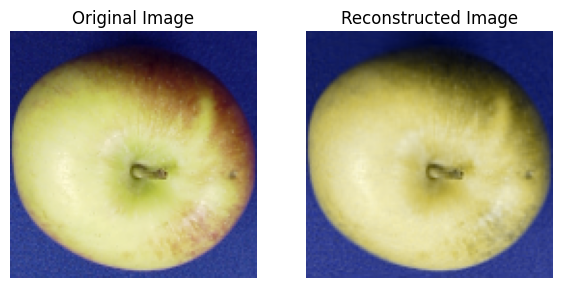

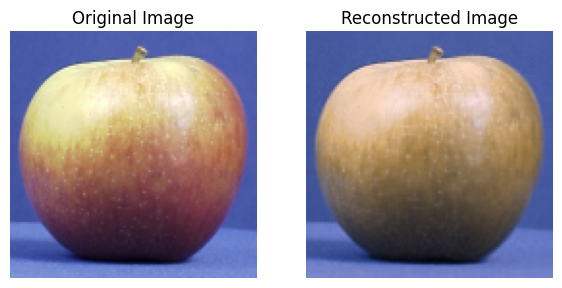

In [11]:
# Evaluate results
tensor_res_top = residual_tensor(tensor_top, tensor_tkd_top)
rel_error_top = tensor_res_top.frob_norm / tensor_top.frob_norm
tensor_res_side = residual_tensor(tensor_side, tensor_tkd_side)
rel_error_side = tensor_res_side.frob_norm / tensor_side.frob_norm

print("Relative error of approximation(top) = {}".format(rel_error_top))
print("Relative error of approximation(side) = {}".format(rel_error_side))
# Reconstruction

tensor_rec_top  = tensor_tkd_top.reconstruct()

tensor_rec_side = tensor_tkd_side.reconstruct()
# Plot original and reconstructed images side by side
plot_tensors(tensor_top, tensor_rec_top)
plot_tensors(tensor_side, tensor_rec_side)

**Include your explanations here**


The images from both views losw the information of red color, indicding that in the process of decomposition, the red channel may be weak represented. But the information of blue color is well preserved. In the side view images, the apple in the reconstruced image changed to be brown.

### Solution: Part 3

If the multi-linear rank corresponding to the channel mode is reduced to 1, the color image will be a grayscale image. This is because setting the color channel to 1 retains only intensity information, thus only representing the grayscale information of the original image.

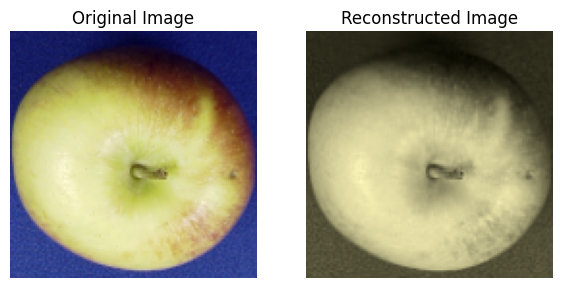

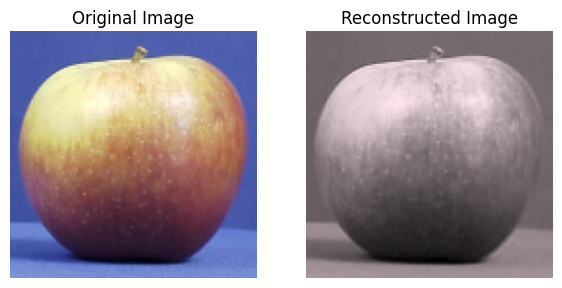

In [15]:
# Create tensors from images
apple_top = get_image(item="apple", view="top")
tensor_top = Tensor(apple_top)
apple_side = get_image(item="apple", view="side")
tensor_side = Tensor(apple_side)
# Perform decomposition
algorithm = HOSVD()
tensor_tkd_top = algorithm.decompose(tensor_top, rank=(50, 50, 1))
tensor_tkd_side = algorithm.decompose(tensor_side, rank=(50, 50, 1))
# Reconstruction

tensor_rec_top  = tensor_tkd_top.reconstruct()

tensor_rec_side = tensor_tkd_side.reconstruct()
# Plot original and reconstructed images side by side
plot_tensors(tensor_top, tensor_rec_top)
plot_tensors(tensor_side, tensor_rec_side)